<a href="https://colab.research.google.com/github/Sehar-tanveer/Langchain-Gemini-Assignmnet/blob/main/Langchain_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q -U google-generativeai

In [ ]:
import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
    text = text.replace("•", "  *")
    return Markdown(textwrap.indent(text, "> ", predicate=lambda _: True))

In [ ]:
# Used to securely store your API key
from google.colab import userdata

In [ ]:
# Or use `os.getenv('GEMINI_API_KEY')` to fetch an environment variable.
GOOGLE_API_KEY = userdata.get("GEMINI_API_KEY")

# Change GEMINI_API_KEY to GOOGLE_API_KEY
genai.configure(api_key=GOOGLE_API_KEY)

In [ ]:
for m in genai.list_models():
    if "generateContent" in m.supported_generation_methods:
        print(m.name)

models/gemini-1.0-pro-latest
models/gemini-1.0-pro
models/gemini-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-pro-exp-0801
models/gemini-1.5-pro-exp-0827
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-exp-0827
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-1.5-flash-8b-exp-0827
models/gemini-1.5-flash-8b-exp-0924
models/learnlm-1.5-pro-experimental
models/gemini-exp-1114
models/gemini-exp-1121


In [ ]:
model = genai.GenerativeModel("gemini-1.5-flash")

In [ ]:
%%time
response = model.generate_content("What are the AI Agents?")

CPU times: user 137 ms, sys: 16.3 ms, total: 153 ms
Wall time: 8.56 s


In [ ]:
to_markdown(response.text)

> AI agents are autonomous entities that perceive their environment through sensors and act upon that environment through actuators to achieve their goals.  They're essentially software programs (or sometimes robots) that can make decisions and take actions independently, without direct human intervention (though they may be designed and guided by humans).
> 
> Here's a breakdown of key characteristics:
> 
> * **Autonomous:** They operate independently, without needing constant human direction.
> * **Goal-oriented:** They have specific objectives they strive to achieve.  These goals can be simple (e.g., reach a certain location) or complex (e.g., manage a company's finances).
> * **Perceptive:** They gather information about their environment through sensors (which could be anything from cameras and microphones to data feeds and APIs).
> * **Reactive:** They respond to changes in their environment.
> * **Proactive:** They don't just react; they can also take initiative to achieve their goals.
> * **Learning (often):** Many AI agents are capable of learning from their experiences and improving their performance over time.
> 
> 
> Different types of AI agents exist, categorized by their capabilities:
> 
> * **Simple Reflex Agents:** These agents respond directly to their current perception, without considering past experiences.
> * **Model-Based Reflex Agents:** These agents maintain an internal model of the world, allowing them to consider the consequences of their actions before taking them.
> * **Goal-Based Agents:** These agents have a specific goal they aim to achieve and plan their actions accordingly.
> * **Utility-Based Agents:** These agents consider not only their goals but also the desirability of different outcomes, maximizing their "utility" or satisfaction.
> * **Learning Agents:** These agents improve their performance over time by learning from their experiences.
> 
> 
> Examples of AI agents include:
> 
> * **Chatbots:** They interact with users, answer questions, and perform tasks based on user requests.
> * **Recommendation systems:** They analyze user data to suggest products, services, or content.
> * **Self-driving cars:** They perceive their environment (using sensors like cameras and lidar) and make decisions to navigate safely.
> * **Game-playing agents:** They learn to play games like chess or Go at a high level.
> * **Robotics agents:** These agents control robots to perform tasks in physical environments.
> 
> 
> In essence, AI agents represent a significant step towards creating truly intelligent systems capable of acting independently in complex environments.  The complexity and capabilities of AI agents vary widely depending on their design and the tasks they are intended to perform.


In [ ]:
response.prompt_feedback

In [ ]:
response.candidates

[content {
  parts {
    text: "AI agents are autonomous entities that perceive their environment through sensors and act upon that environment through actuators to achieve their goals.  They\'re essentially software programs (or sometimes robots) that can make decisions and take actions independently, without direct human intervention (though they may be designed and guided by humans).\n\nHere\'s a breakdown of key characteristics:\n\n* **Autonomous:** They operate independently, without needing constant human direction.\n* **Goal-oriented:** They have specific objectives they strive to achieve.  These goals can be simple (e.g., reach a certain location) or complex (e.g., manage a company\'s finances).\n* **Perceptive:** They gather information about their environment through sensors (which could be anything from cameras and microphones to data feeds and APIs).\n* **Reactive:** They respond to changes in their environment.\n* **Proactive:** They don\'t just react; they can also take i

In [ ]:
%%time
response = model.generate_content("What are the AI Agents?", stream=True)

CPU times: user 103 ms, sys: 12.8 ms, total: 116 ms
Wall time: 5.92 s


In [ ]:
for chunk in response:
    print(chunk.text)
    print("_" * 80)

AI
________________________________________________________________________________
 agents are autonomous entities that perceive their environment through sensors and act upon that environment through
________________________________________________________________________________
 actuators to achieve goals.  They're a more advanced concept than simple AI
________________________________________________________________________________
 algorithms; instead of just processing data, they *interact* with the world.

Here's a breakdown of key characteristics:

* **Autonomy:**
________________________________________________________________________________
  They operate independently, without constant human intervention.  They can make decisions and take actions based on their perceived environment and internal goals.

* **Perception:**
________________________________________________________________________________
 They receive input from the environment through sensors. These sensors c

In [ ]:
response = model.generate_content("What are the AI Agents?", stream=True)

In [ ]:
try:
    response.text
except Exception as e:
    print(f"{type(e).__name__}: {e}")

IncompleteIterationError: Please let the response complete iteration before accessing the final accumulated
attributes (or call `response.resolve()`)


In [ ]:
!curl -o image.jpg https://img.freepik.com/free-photo/robot-performing-ordinary-human-job_23-2151008305.jpg?t=st=1732260116~exp=1732263716~hmac=371c68de13bb2f3d05725217f36395ce9f5cd51c6404d60ce4ef50c6535470d9&w=1060

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 37558  100 37558    0     0  18418      0  0:00:02  0:00:02 --:--:-- 18419


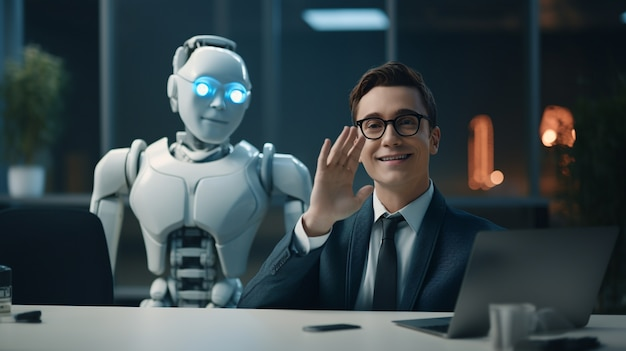

In [ ]:
import PIL.Image

img = PIL.Image.open("image.jpg")
img

In [ ]:
model = genai.GenerativeModel("gemini-1.5-flash")

In [ ]:
# !pip install --upgrade google-generativeai #Upgrade google-generativeai

# import google.generativeai as genai
import PIL.Image

# Assuming 'model' is already defined and initialized as genai.GenerativeModel("gemini-1.5-flash")
# Assuming 'img' is already loaded using PIL.Image.open("image.jpg")

prompt = "Describe this image."

# Instead of passing 'image' as a keyword argument, include it as part of the prompt.
# Convert the image to base64 encoding
import base64
from io import BytesIO

buffered = BytesIO()
img.save(buffered, format="JPEG")
img_str = base64.b64encode(buffered.getvalue()).decode()

# Pass the prompt and the image description together as a list of contents.
response = model.generate_content([prompt, f"Image: {img_str}"])


# Assuming you have a function named 'to_markdown' to convert the response text to markdown
to_markdown(response.text)

> The image is a scan of a scientific paper or medical journal article, specifically focusing on a section containing numerous chemical formulas and reactions.  The text is predominantly in a serif typeface, typical of scientific publications.  While the exact content is illegible due to the compression and quality of the image provided,  it's clearly a detailed presentation of chemical information, possibly related to organic chemistry or medicinal chemistry given the complexity of the structures depicted.  The layout suggests it's a multi-page document, with page numbers likely present though not clearly visible in the provided snippet.


In [ ]:
response = model.generate_content(
    [
        "Write a short, engaging blog post based on this picture. It should include a description of the robot working with human and AI Agents.",
        img,
    ],
    stream=True,
)
response.resolve()

In [ ]:
to_markdown(response.text)

> ## The Future of Teamwork: Humans, Robots, and AI, Working Together
> 
> The image speaks volumes. A friendly-faced robot stands beside a young professional, both seemingly engaged in a collaborative task. This isn't science fiction; this is a glimpse into the rapidly evolving future of work.  Forget the robots-stealing-jobs narrative; the reality is far more nuanced and exciting.
> 
> This image depicts a powerful synergy between human ingenuity and artificial intelligence.  The robot, with its advanced sensors and processing power, could be handling data analysis, complex calculations, or even physical tasks, freeing up the human agent to focus on strategic thinking, creativity, and relationship-building. This is augmented intelligence at its finest.
> 
> But the story doesn't end there.  Behind the scenes, likely unseen, is the silent power of AI agents.  These sophisticated algorithms might be optimizing workflows, predicting potential challenges, and providing real-time support to both the human and the robot.  Imagine AI agents proactively flagging potential errors, suggesting solutions, and streamlining the entire process, ensuring peak efficiency.
> 
> This isn't simply humans working *with* robots and AI; it's a sophisticated collaboration where each entity plays a crucial and complementary role. The human provides the essential context, critical thinking, and emotional intelligence, while the robots and AI agents deliver speed, precision, and vast data processing capabilities.  The result?  Unprecedented productivity and innovation.
> 
> The future of work is collaborative, intelligent, and surprisingly human.  And it looks a lot like this picture.


In [ ]:
model = genai.GenerativeModel("gemini-1.5-flash")
chat = model.start_chat(history=[])
chat

ChatSession(
    model=genai.GenerativeModel(
        model_name='models/gemini-1.5-flash',
        generation_config={},
        safety_settings={},
        tools=None,
        system_instruction=None,
        cached_content=None
    ),
    history=[]
)

In [ ]:
response = chat.send_message(
    "In one sentence, explain how AI Agents helps human."
)
to_markdown(response.text)

> AI agents automate tasks, analyze data, and provide insights to augment human capabilities and improve efficiency across various domains.


In [ ]:
chat.history

[parts {
   text: "In one sentence, explain how AI Agents helps human."
 }
 role: "user",
 parts {
   text: "AI agents automate tasks, analyze data, and provide insights to augment human capabilities and improve efficiency across various domains.\n"
 }
 role: "model"]

In [ ]:
response = chat.send_message(
    "Okay, how about a more detailed explanation to a high schooler?", stream=True
)

for chunk in response:
    print(chunk.text)
    print("_" * 80)

Imagine
________________________________________________________________________________
 having a super-efficient, tireless assistant that can handle repetitive tasks, analyze huge
________________________________________________________________________________
 amounts of information faster than you ever could, and even learn and adapt to help
________________________________________________________________________________
 you solve complex problems. That's essentially what an AI agent is.  They're computer programs designed to perform specific tasks or achieve specific goals, often
________________________________________________________________________________
 autonomously.  This can range from scheduling your appointments and managing your emails to helping doctors diagnose diseases or scientists discover new materials.  They're like having
________________________________________________________________________________
 a specialized expert on call 24/7, freeing up your time an

In [ ]:
for message in chat.history:
    display(to_markdown(f"**{message.role}**: {message.parts[0].text}"))

> **user**: In one sentence, explain how AI Agents helps human.

> **model**: AI agents automate tasks, analyze data, and provide insights to augment human capabilities and improve efficiency across various domains.


> **user**: Okay, how about a more detailed explanation to a high schooler?

> **model**: Imagine having a super-efficient, tireless assistant that can handle repetitive tasks, analyze huge amounts of information faster than you ever could, and even learn and adapt to help you solve complex problems. That's essentially what an AI agent is.  They're computer programs designed to perform specific tasks or achieve specific goals, often autonomously.  This can range from scheduling your appointments and managing your emails to helping doctors diagnose diseases or scientists discover new materials.  They're like having a specialized expert on call 24/7, freeing up your time and mental energy for more creative and strategic work.
